# Lab 3: 逻辑回归 - 预测糖尿病

## 1. 使用Pandas读取数据

In [1]:
import os
import sys
import pandas as pd

path = os.path.dirname(os.getcwd())
sys.path.append(path)

from common.filesio import FilesIO
data = pd.read_csv(FilesIO.getLectureData('diabetes.csv'))
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


head()函数说明： https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.head.html

### Q1：如何显示前10行的数据？

In [2]:
data.head(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


describe: https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.describe.html

In [3]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


## 直方图

hist(): https://matplotlib.org/3.5.0/api/_as_gen/matplotlib.pyplot.hist.html

http://www.manongjc.com/detail/30-nbmzjuyfvyhlvpc.html

DataFrame.hist(column=None, by=None, grid=True, xlabelsize=None, xrot=None, ylabelsize=None, yrot=None, ax=None, sharex=False, sharey=False, figsize=None, layout=None, bins=10, backend=None, legend=False, **kwargs)

主要参数：

data： DataFrame
保存数据的 pandas 对象。

column：str 或序列，可选
如果通过，将用于将数据限制为列的子集。

array([[<AxesSubplot:title={'center':'Pregnancies'}>,
        <AxesSubplot:title={'center':'Glucose'}>,
        <AxesSubplot:title={'center':'BloodPressure'}>],
       [<AxesSubplot:title={'center':'SkinThickness'}>,
        <AxesSubplot:title={'center':'Insulin'}>,
        <AxesSubplot:title={'center':'BMI'}>],
       [<AxesSubplot:title={'center':'DiabetesPedigreeFunction'}>,
        <AxesSubplot:title={'center':'Age'}>,
        <AxesSubplot:title={'center':'Outcome'}>]], dtype=object)

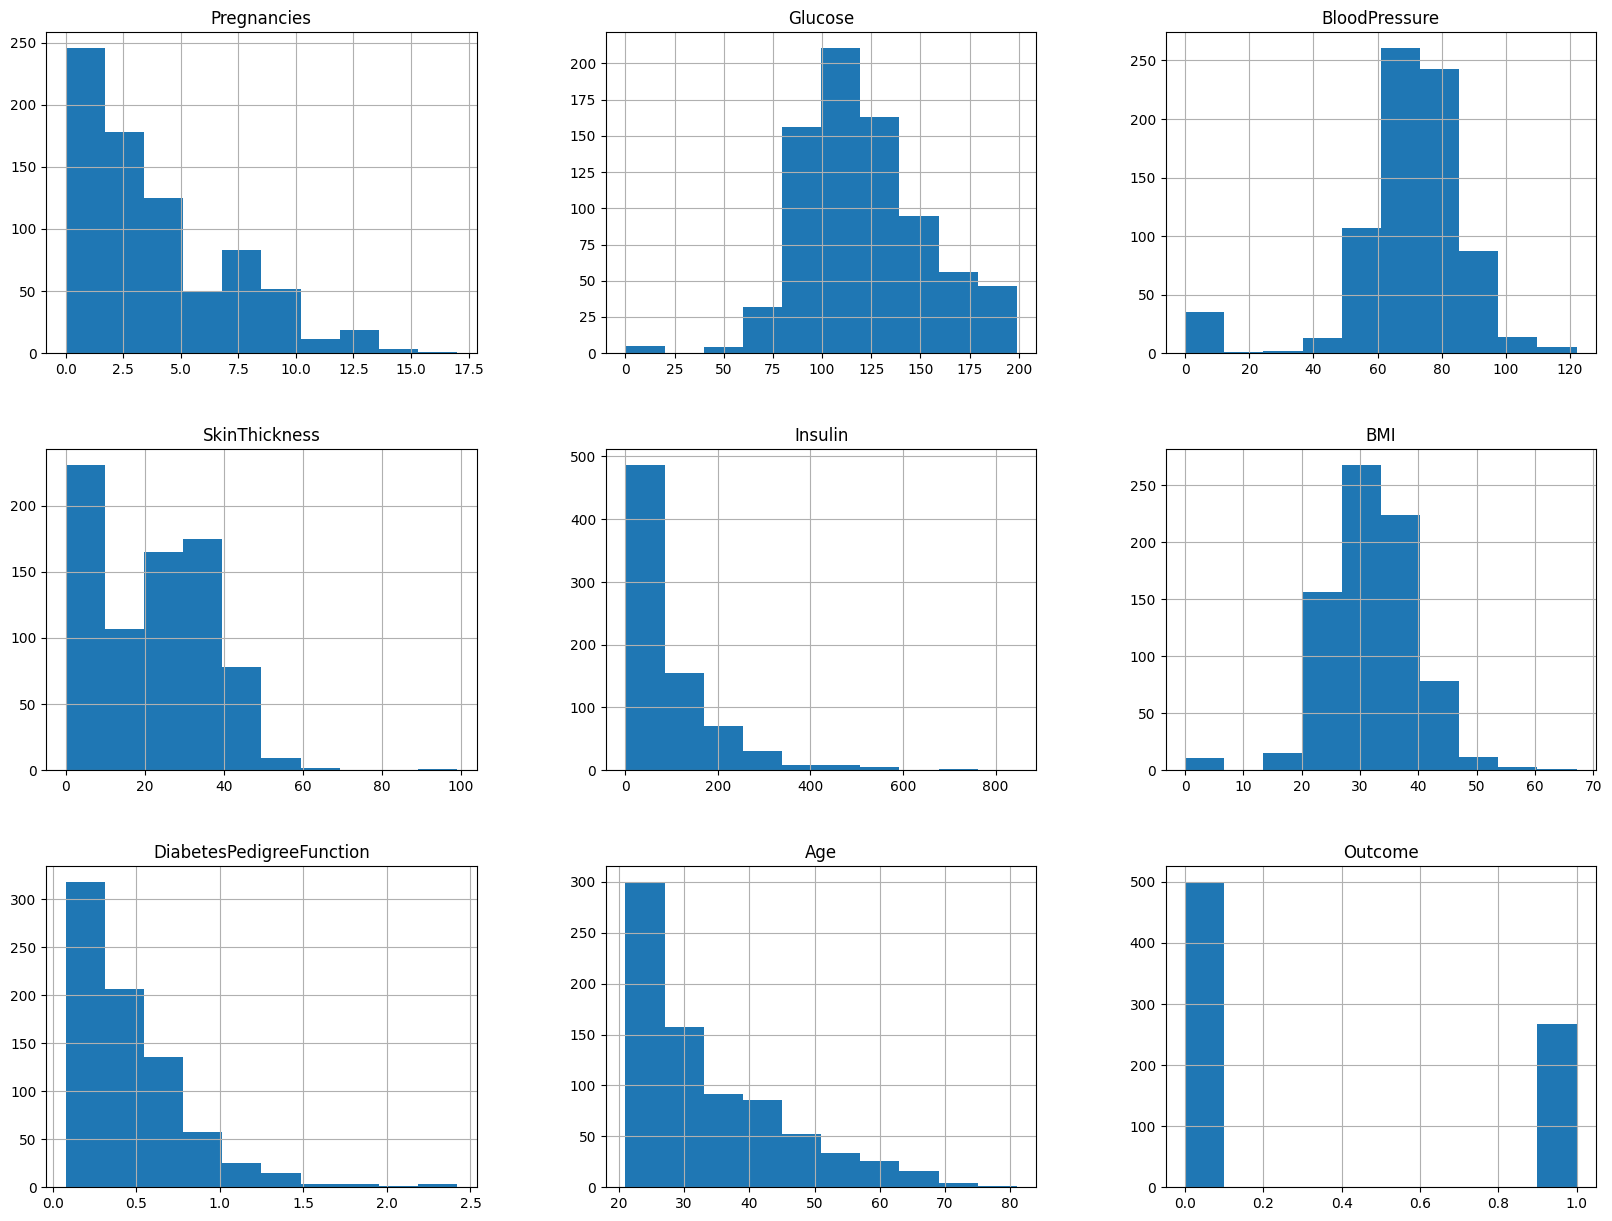

In [4]:
import matplotlib.pyplot as plt

%matplotlib inline
data.hist(figsize = (20, 15))

### Q2：患有糖尿病的比例？

In [5]:
outcome_count = data['Outcome'].value_counts()
print(outcome_count)

0    500
1    268
Name: Outcome, dtype: int64


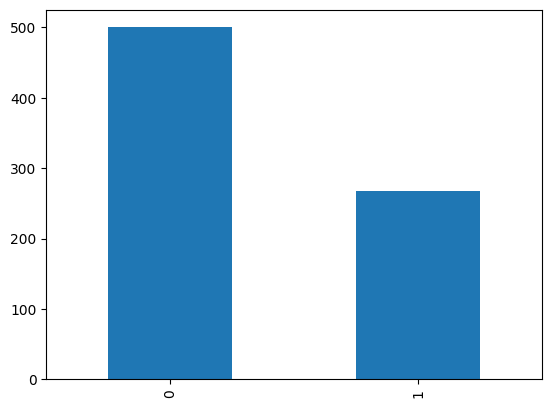

In [6]:
outcome_count.plot(kind = 'bar')
plt.show()

## 箱线图

Glucose在患者组（y=1）和正常人组（y=0）的情况

<AxesSubplot:xlabel='Outcome', ylabel='Glucose'>

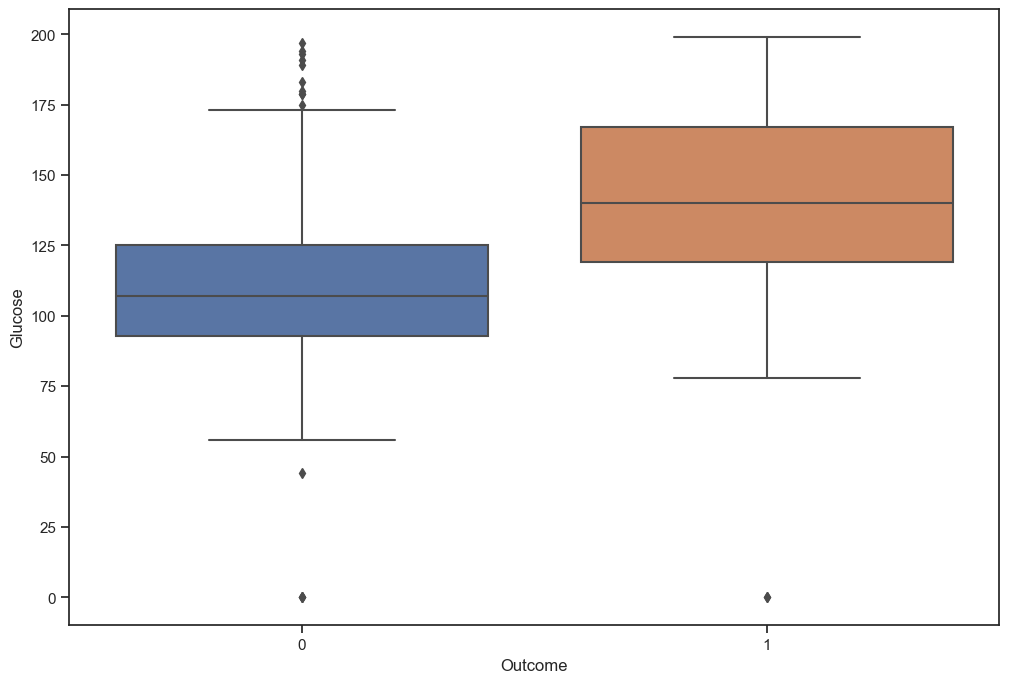

In [7]:
import seaborn as sns
sns.set(rc={'figure.figsize':(12,8)})
sns.set_style('ticks') 
# style: dict, or one of {darkgrid, whitegrid, dark, white, ticks} A dictionary of parameters or the name of a preconfigured style.
sns.boxplot(x = "Outcome", y = "Glucose", data = data) 

### Q3: 画出BloodPressure, Insulin, Pregnancies、DiabetesPedigreeFunction 在患者组（y=1）和正常人组（y=0）的情况

## 2. 选择要使用的特征（features）X 和输出/目标变量Y

In [8]:
feature_cols = ['Insulin', 'BMI', 'Age','Glucose','BloodPressure','DiabetesPedigreeFunction']
X = data[feature_cols] # 特征
y = data.Outcome # 输出/目标变量
print(y)

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64


## 3. 构建训练集和测试集

https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html
stratify的作用？

In [9]:
from sklearn.model_selection import train_test_split # 随机生成训练集和测试集
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.3, random_state = 1, stratify = y)
# stratify = y 用于让测试集和训练集同样分布,避免出现训练集或测试集中出现绝大多数为y = 1 的情况

## 4. sklearn的逻辑回归

https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html

https://blog.csdn.net/qq_38384924/article/details/97499694


sklearn.linear_model.LogisticRegression(penalty='l2', *, dual=False, tol=0.0001, C=1.0, fit_intercept=True, intercept_scaling=1, class_weight=None, random_state=None, solver='lbfgs', max_iter=100, multi_class='auto', verbose=0, warm_start=False, n_jobs=None, l1_ratio=None)[source]


主要参数：

penalty(惩罚项): 默认l2正则化，可为’l1’ ，‘l2’，‘elasticnet’ 或 ‘none’。‘netton-cg’, ‘sag’, ‘lbfgs’只支持’l2’，因为’l1’正则化的损失函数不是连续可导的。调参时如果主要是为了解决过拟合，选择’l2’正则化就够了。若选择’l2’正则化还是过拟合，可考虑’l1’正则化。若模型特征非常多，希望一些不重要的特征系数归零，从而让模型系数化的话，可使用’l1’正则化。


fit_intercept: bool，默认True，指定逻辑回归模型中是否有截距项，默认有。

class_weight： dict or ‘balanced’，默认为None，用于标示分类模型中各个类的权重。权重Weights与{class_label：weight}形式的类相关联。 如果没有给出，所有类的权重为1。“balanced”模式使用类标y的值来自动调整与输入数据中的类频率成反比的权重，如n_samples /（n_classes * np.bincount（y））。请注意，如果指定了sample_weight，这些权重将与sample_weight（通过fit方法传递）相乘。

### step 1: 定义逻辑回归模型

In [10]:
from sklearn.linear_model import LogisticRegression

# 逻辑回归模型的加载, 不使用正则化
model = LogisticRegression(penalty='none') # type: ignore

### step 2: 在训练集上训练（拟合fit）逻辑回归模型

使用fit函数

In [11]:
# 在训练集上进行模型的训练
model.fit(X_train,y_train) # type: ignore

c:\Users\NUC\Desktop\GitsProject\MachineLearningStudy\venv\lib\site-packages\sklearn\linear_model\_logistic.py:1183: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(


LogisticRegression(penalty='none')

### step 3: 查看在训练集上估计的逻辑回归参数

In [12]:
coef = model.coef_[0]
pd.DataFrame(coef, 
             X.columns, 
             columns=['coef']).sort_values(by='coef', ascending=False)

,coef
DiabetesPedigreeFunction,1.007931
BMI,0.090487
Age,0.037846
Glucose,0.032905
Insulin,-0.000132
BloodPressure,-0.014892


In [13]:
import numpy as np
exp_coef = np.exp(coef)

pd.DataFrame(exp_coef, 
             X.columns, 
             columns=['coef']).sort_values(by='coef', ascending=False)

,coef
DiabetesPedigreeFunction,2.739927
BMI,1.094707
Age,1.038572
Glucose,1.033452
Insulin,0.999868
BloodPressure,0.985218


### Q：怎么解释？

## score() 计算分类正确率

### 计算训练集上的正确率

In [14]:
train_accuracy = model.score(X_train, y_train)
train_accuracy

0.7858472998137802

## 5. 在测试集上做预测

### predict(X): Predict class labels for samples in X.

In [15]:
y_pred = model.predict(X_test) 

### predict_proba(X): probability estimates.

In [16]:
y_pred_prob = model.predict_proba(X_test) 
y_pred_prob

array([[0.73193875, 0.26806125],
       [0.1726817 , 0.8273183 ],
       [0.72126429, 0.27873571],
       [0.95030718, 0.04969282],
       [0.68200658, 0.31799342],
       [0.8855911 , 0.1144089 ],
       [0.17185127, 0.82814873],
       [0.71025405, 0.28974595],
       [0.56832624, 0.43167376],
       [0.90451454, 0.09548546],
       [0.7020883 , 0.2979117 ],
       [0.38261192, 0.61738808],
       [0.9347342 , 0.0652658 ],
       [0.52105426, 0.47894574],
       [0.95972778, 0.04027222],
       [0.90565496, 0.09434504],
       [0.89057336, 0.10942664],
       [0.86197988, 0.13802012],
       [0.59855511, 0.40144489],
       [0.92953727, 0.07046273],
       [0.65433402, 0.34566598],
       [0.69085038, 0.30914962],
       [0.70685796, 0.29314204],
       [0.18857017, 0.81142983],
       [0.22479819, 0.77520181],
       [0.33580314, 0.66419686],
       [0.56478074, 0.43521926],
       [0.61990165, 0.38009835],
       [0.41442306, 0.58557694],
       [0.24590658, 0.75409342],
       [0.

## 6. 评价模型（在测试集上）

### 6.1 正确率、precision、recall、F1值

In [17]:
test_accuracy = model.score(X_test, y_test)
print("Accuracy", test_accuracy)

from sklearn import metrics
test_precision = metrics.precision_score(y_test, y_pred)
print("Precision", test_precision)

test_recall = metrics.recall_score(y_test, y_pred)
print("Recall:", test_recall)

test_f1 = metrics.f1_score(y_test, y_pred)
print("test_f1:", test_f1)

Accuracy 0.7619047619047619
Precision 0.7096774193548387
Recall: 0.5432098765432098
test_f1: 0.6153846153846153


### 6.2 混淆矩阵

In [18]:
from sklearn import metrics

cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

array([[132,  18],
       [ 37,  44]], dtype=int64)

### 可视化混淆矩阵
用Seaborn

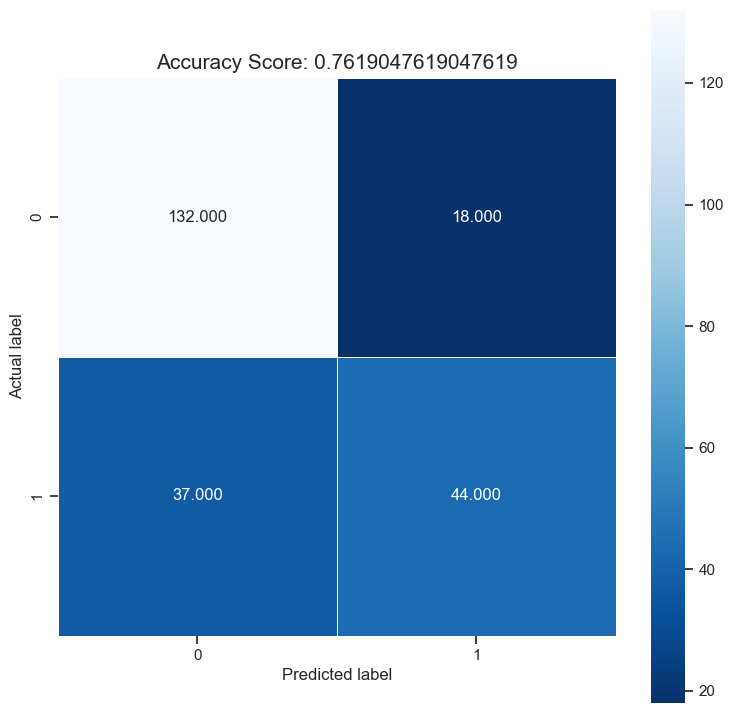

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(9,9))
sns.heatmap(cnf_matrix, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r'); # type: ignore
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(test_accuracy)
plt.title(all_sample_title, size = 15);

### 6.3 计算AUC : AUC 接近1表明模型好，如果小于0.5表明不好。

In [20]:
test_auc_roc = metrics.roc_auc_score(y_test, y_pred_prob[::,1])
print('Testing AUC:',  test_auc_roc)

Testing AUC: 0.8179423868312757


### 6.4 ROC Curve

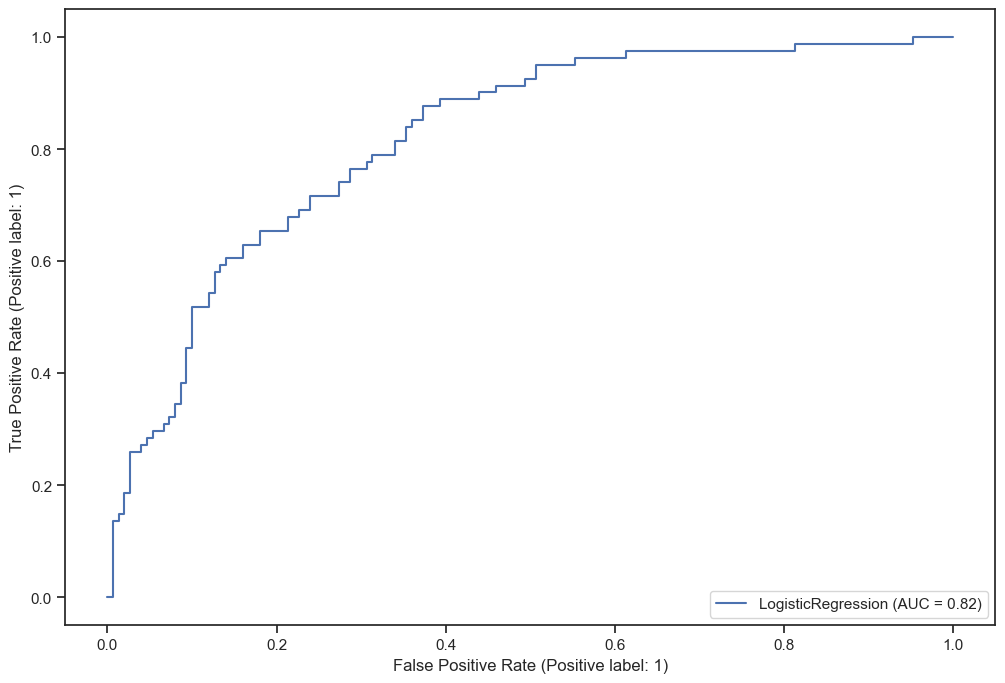

In [21]:
metrics.RocCurveDisplay.from_estimator(model,X_test,y_test)

In [22]:
from sklearn.linear_model import LogisticRegression
LogisticRegression

sklearn.linear_model._logistic.LogisticRegression